### SPYC - Spy Your Competitor

With LanceDB as the backbone, SPYC ensures high-performance search and retrieval, making it easy to identify patterns, emerging trends, and key business opportunities. Whether you're analyzing competitor strategies, product positioning, or market sentiments, SPYC helps you make data-driven decisions with precision.



Key Features:

✅ AI-Powered Search – Combines semantic search and FTS for accurate results

✅ Competitor & Product Analysis – Extracts insights from structured and unstructured data

✅ Efficient Data Storage – Uses LanceDB for fast and scalable vector indexing

✅ Market Trend Detection – Identifies emerging trends with AI-driven analytics


🚀 Empower your business with actionable insights using SPYC!

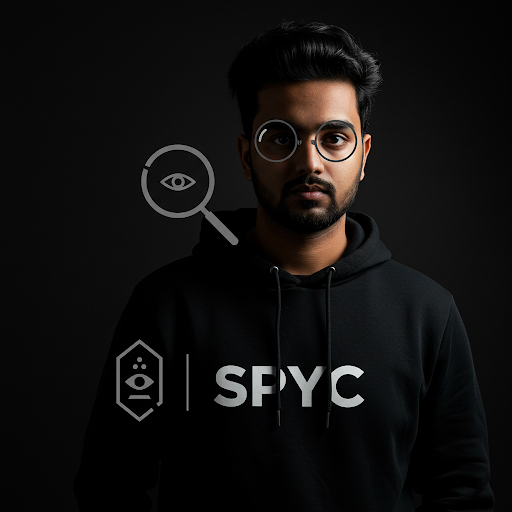

This is a sample project using dummy data. For real world application, we might need to add scraped data into the table using data pipelines. Assuming we already have structured data today, we'll take the next step and explore how vector databases can help us in competitor analysis  in fast and accurate way using LLMs.

In [ ]:
# SPYC - AI Competitor Intelligence Platform with Agentic Querying
# This notebook creates a vector database system for tracking competitive intelligence
# for an AI agent building company "SPYC", then wraps key functions as tools
# for an agent that uses an LLM (e.g. Gemini) to decide which tool to call.

In [137]:
!pip install lancedb tantivy
# ----- Install Required Packages -----
!pip install langchain_google_genai
!pip install lancedb pandas beautifulsoup4 requests langchain sentence-transformers langchain_community

In [159]:
from google.colab import userdata
lance_api = userdata.get('lance_api')


from google.colab import userdata
gemini  = userdata.get('gemini')

#### Connecting with LanceDB Cloud

In [139]:
import lancedb

db = lancedb.connect(
  uri="db://uselessai-in-qze0um",
  api_key=lance_api,
  region="us-east-1"
)



#### SPYC

In [164]:
import os
import json
import datetime
import pandas as pd
import lancedb
from lancedb.embeddings import get_registry

# Import LangChain agent components
from langchain.agents import initialize_agent, Tool

# ===== 1. Setup & Configuration =====

# Get embeddings model from registry (using sentence-transformers)
embeddings = get_registry().get("sentence-transformers").create()

print("LanceDB and embeddings model initialized successfully")

LanceDB and embeddings model initialized successfully


In [165]:

# ===== 2. Data Models & Sample Data =====
# (Same sample data for competitors, products, content, insights as in your code)

competitors_data = [
    {
        "id": 1,
        "name": "AgentForge",
        "founded_year": 2020,
        "company_size": "50-100",
        "funding": "$15M Series A",
        "description": "Building AI agents for customer service automation with focus on retail and e-commerce",
        "main_products": "CustomerBot, RetailAssist, E-commerce Agent Suite",
        "business_model": "SaaS with tiered pricing based on conversation volume",
        "target_markets": ["Retail", "E-commerce", "Customer Support"],
        "website": "agentforge.ai",
        "hq_location": "San Francisco, CA"
    },

    {
        "id": 2,
        "name": "CogniAgents",
        "founded_year": 2021,
        "company_size": "25-50",
        "funding": "$8M Seed",
        "description": "Creating specialized AI agents that can autonomously complete complex workflows in enterprise settings",
        "main_products": "WorkflowGPT, TaskMaster, Agent Builder Platform",
        "business_model": "Enterprise licensing with professional services",
        "target_markets": ["Enterprise", "Business Process Automation", "Workflow Management"],
        "website": "cogniagents.com",
        "hq_location": "Boston, MA"
    },

    {
        "id": 3,
        "name": "AgentiveAI",
        "founded_year": 2022,
        "company_size": "10-25",
        "funding": "$5M Seed",
        "description": "Open source framework for building customizable AI agents with improved reasoning capabilities",
        "main_products": "Agentive Framework, AgentStudio IDE, Enterprise Agent Manager",
        "business_model": "Open core with enterprise features as paid tier",
        "target_markets": ["Developers", "AI Research", "Enterprise IT"],
        "website": "agentive.ai",
        "hq_location": "Austin, TX"
    },
    {
        "id": 4,
        "name": "Copilot Systems",
        "founded_year": 2019,
        "company_size": "100-250",
        "funding": "$45M Series B",
        "description": "AI assistants that integrate with productivity software to automate tasks and enhance productivity",
        "main_products": "TaskCopilot, MeetingCopilot, EmailCopilot, Research Assistant",
        "business_model": "Freemium SaaS with team and enterprise plans",
        "target_markets": ["Knowledge Workers", "Remote Teams", "Enterprise Productivity"],
        "website": "copilotsystems.com",
        "hq_location": "New York, NY"
    }
]

products_data = [
    {
        "id": 1,
        "competitor_id": 1,
        "name": "CustomerBot",
        "launch_date": "2021-03-15",
        "description": "AI customer service agent that handles complex customer inquiries across multiple channels",
        "key_features": "Natural language understanding, Sentiment analysis, Multi-channel support, CRM integration",
        "pricing": "Starting at $1000/month for 1000 conversations",
        "technology_stack": "GPT-4, Custom NLP, React frontend, Python backend",
        "target_customers": "Medium to large retailers"
    },
    {
        "id": 2,
        "competitor_id": 1,
        "name": "RetailAssist",
        "launch_date": "2022-06-10",
        "description": "In-store and online shopping assistant that helps customers find products and provides recommendations",
        "key_features": "Product knowledge base, Personalized recommendations, Inventory integration, Voice interface",
        "pricing": "$1500/month per store location",
        "technology_stack": "GPT-4, Vector search, iOS/Android apps, Node.js backend",
        "target_customers": "Physical retail stores with online presence"
    },
    {
        "id": 3,
        "competitor_id": 2,
        "name": "WorkflowGPT",
        "launch_date": "2022-01-20",
        "description": "AI system that orchestrates complex business workflows by coordinating multiple specialized agents",
        "key_features": "Workflow designer, Multi-agent coordination, API integrations, Audit logging",
        "pricing": "Custom enterprise pricing, typically $50k-200k annually",
        "technology_stack": "Custom LLM, React dashboard, Python middleware, Enterprise connectors",
        "target_customers": "Fortune 1000 companies"
    },
    {
        "id": 4,
        "competitor_id": 3,
        "name": "Agentive Framework",
        "launch_date": "2022-09-05",
        "description": "Open source framework for building, testing and deploying custom AI agents with advanced reasoning",
        "key_features": "Agent reasoning engine, Tool use framework, Memory systems, Multi-agent communication",
        "pricing": "Free open source, enterprise support starting at $5k/month",
        "technology_stack": "Python, React, Various LLM support, Docker deployment",
        "target_customers": "AI developers and researchers"
    },
    {
        "id": 5,
        "competitor_id": 4,
        "name": "TaskCopilot",
        "launch_date": "2020-11-12",
        "description": "AI assistant that helps users manage and complete tasks by integrating with productivity tools",
        "key_features": "Task prioritization, Email processing, Calendar management, Document drafting",
        "pricing": "Free tier, $20/user/month pro, $35/user/month enterprise",
        "technology_stack": "GPT-3.5, Chrome extension, SaaS platform, Microsoft 365 integration",
        "target_customers": "Knowledge workers and professionals"
    }
]

content_data = [
    {
        "id": 1,
        "competitor_id": 1,
        "platform": "Twitter",
        "post_date": "2023-08-15",
        "content": "Excited to announce our new CustomerBot 2.0 with enhanced sentiment analysis and multilingual support!",
        "url": "https://twitter.com/AgentForge/status/123456789",
        "engagement": {"likes": 145, "retweets": 32, "replies": 18}
    },
    {
        "id": 2,
        "competitor_id": 2,
        "platform": "LinkedIn",
        "post_date": "2023-07-22",
        "content": "CogniAgents raises $8M seed round to build the next generation of enterprise workflow automation with AI agents",
        "url": "https://linkedin.com/company/cogniagents/posts/12345",
        "engagement": {"likes": 342, "comments": 56, "shares": 89}
    },
    {
        "id": 3,
        "competitor_id": 3,
        "platform": "GitHub",
        "post_date": "2023-09-01",
        "content": "Agentive Framework v2.0 released with improved reasoning capabilities and support for multi-agent collaboration",
        "url": "https://github.com/agentiveai/framework/releases/v2.0",
        "engagement": {"stars": 2500, "forks": 320, "issues": 45}
    },
    {
        "id": 4,
        "competitor_id": 4,
        "platform": "TechCrunch",
        "post_date": "2023-06-10",
        "content": "Copilot Systems secures $45M Series B to expand its AI productivity assistant suite across enterprise customers",
        "url": "https://techcrunch.com/2023/06/10/copilot-systems-45m-series-b",
        "engagement": {"comments": 78, "shares": 256}
    },
    {
        "id": 5,
        "competitor_id": 1,
        "platform": "ProductHunt",
        "post_date": "2023-04-05",
        "content": "RetailAssist launches on ProductHunt - Your AI shopping assistant for physical and online retail",
        "url": "https://producthunt.com/posts/retailassist",
        "engagement": {"upvotes": 580, "comments": 93}
    },
    {
        "id": 6,
        "competitor_id": 2,
        "platform": "Blog",
        "post_date": "2023-08-30",
        "content": "How CogniAgents is revolutionizing enterprise workflows with our new agent orchestration platform",
        "url": "https://cogniagents.com/blog/revolutionizing-enterprise-workflows",
        "engagement": {"views": 1250, "comments": 24}
    }
]

insights_data = [
    {
        "id": 1,
        "title": "AI Agent Market Landscape 2023",
        "date": "2023-07-15",
        "source": "SPYC Research Team",
        "content": "The AI agent market is seeing rapid growth with enterprise adoption accelerating. Key segments include customer service agents, productivity assistants, and specialized industry agents. Open source frameworks are gaining traction among developers.",
        "competitors_mentioned": [1, 2, 4],
        "key_trends": ["Enterprise adoption", "Vertical specialization", "Multi-agent systems", "Open source frameworks"],
        "market_size": "$2.5B with projected 35% CAGR"
    },
    {
        "id": 2,
        "title": "Customer Service Agent Competitive Analysis",
        "date": "2023-08-10",
        "source": "SPYC Research Team",
        "content": "In the customer service AI agent space, we're seeing increasing focus on emotional intelligence and personalization. AgentForge leads in retail, while several new entrants focus on healthcare and financial services verticals.",
        "competitors_mentioned": [1],
        "key_trends": ["Emotional intelligence", "Industry-specific knowledge", "Omnichannel support"],
        "market_size": "$850M segment with 42% CAGR"
    }
]


In [166]:
from lancedb.pydantic import LanceModel, Vector
from lancedb.embeddings import get_registry
import pandas as pd
import json


# ============================
# Define Models Using LanceModel
# ============================

class Competitor(LanceModel):
    id: int
    name: str
    founded_year: int
    company_size: str
    funding: str
    description: str = embeddings.SourceField()  # This field will be embedded
    description_vector: Vector(embeddings.ndims()) = embeddings.VectorField()
    main_products: str
    business_model: str = embeddings.SourceField()  # This field will be embedded
    business_model_vector: Vector(embeddings.ndims()) = embeddings.VectorField()
    # Convert list to string for simplicity; you could also JSON-dump if needed.
    target_markets: str
    website: str
    hq_location: str

class Product(LanceModel):
    id: int
    competitor_id: int
    name: str
    launch_date: str
    description: str = embeddings.SourceField()  # Embed product description
    description_vector: Vector(embeddings.ndims()) = embeddings.VectorField()
    key_features: str = embeddings.SourceField()   # Embed key features
    features_vector: Vector(embeddings.ndims()) = embeddings.VectorField()
    pricing: str
    technology_stack: str
    target_customers: str

class Content(LanceModel):
    id: int
    competitor_id: int
    platform: str
    post_date: str
    content: str = embeddings.SourceField()  # Embed the content text
    content_vector: Vector(embeddings.ndims()) = embeddings.VectorField()
    url: str
    # Store engagement as a JSON string
    engagement_str: str

class Insight(LanceModel):
    id: int
    title: str = embeddings.SourceField()   # Embed the title
    title_vector: Vector(embeddings.ndims()) = embeddings.VectorField()
    date: str
    source: str
    content: str = embeddings.SourceField()   # Embed the insight content
    content_vector: Vector(embeddings.ndims()) = embeddings.VectorField()
    # Store lists as JSON strings for simplicity
    competitors_mentioned_str: str
    key_trends_str: str
    market_size: str

# ============================
# Table Creation Functions
# ============================

def create_competitors_table(db, competitors_data):
    """Create and populate the competitors table."""
    df_competitors = pd.DataFrame(competitors_data)
    # Convert target_markets list to JSON string for storage
    df_competitors['target_markets'] = df_competitors['target_markets'].apply(json.dumps)

    table = db.create_table(
        "competitors",
        schema=Competitor,
        mode="overwrite",
    )
    table.add(df_competitors.to_dict(orient='records'))
    print(f"Created competitors table with {len(df_competitors)} rows")
    return table

def create_products_table(db, products_data):
    """Create and populate the products table."""
    df_products = pd.DataFrame(products_data)
    table = db.create_table(
        "products",
        schema=Product,
        mode="overwrite",
    )
    table.add(df_products.to_dict(orient='records'))
    print(f"Created products table with {len(df_products)} rows")
    return table

def create_content_table(db, content_data):
    """Create and populate the content table."""
    df_content = pd.DataFrame(content_data)
    # Convert engagement dict to JSON string
    df_content['engagement_str'] = df_content['engagement'].apply(json.dumps)
    table = db.create_table(
        "content",
        schema=Content,
        mode="overwrite",
    )
    # Drop original engagement column before adding data
    table.add(df_content.drop(columns=['engagement']).to_dict(orient='records'))
    print(f"Created content table with {len(df_content)} rows")
    return table

def create_insights_table(db, insights_data):
    """Create and populate the insights table."""
    df_insights = pd.DataFrame(insights_data)
    # Convert list columns to JSON strings for storage
    df_insights['competitors_mentioned_str'] = df_insights['competitors_mentioned'].apply(json.dumps)
    df_insights['key_trends_str'] = df_insights['key_trends'].apply(json.dumps)

    table = db.create_table(
        "insights",
        schema=Insight,
        mode="overwrite",
    )
    # Drop the original list columns before adding data
    table.add(df_insights.drop(columns=['competitors_mentioned', 'key_trends']).to_dict(orient='records'))
    print(f"Created insights table with {len(df_insights)} rows")
    return table


In [144]:
# Create all tables. Run this CELL one time only otherwise it'll keep overwriting the table and also remove the index so you might need to create everytime. Overwriting the table removes it's index.

competitors_table = create_competitors_table(db,competitors_data)
products_table = create_products_table(db,products_data)
content_table = create_content_table(db,content_data)
insights_table = create_insights_table(db,insights_data)
print("All tables created successfully!")

Created competitors table with 4 rows
Created products table with 5 rows
Created content table with 6 rows
Created insights table with 2 rows
All tables created successfully!


In [182]:
#just to make sure we didn't miss opening those remote tables.
competitors_table = db.open_table("competitors")
products_table = db.open_table("products")
content_table = db.open_table("content")
insights_table = db.open_table("insights")

print(competitors_table.list_indices())
print(products_table.list_indices())
print(content_table.list_indices())
print(insights_table.list_indices())


# # competitors_table.list_indices()
# competitors_table.search("enterprise", query_type="fts", fts_columns=["description"]).to_pandas()
# #to create multi column index you need to pass them one by one in loop to create them.
# #Remember they should be text columns.


[Index(FTS, columns=["description"], name="description_idx"), Index(FTS, columns=["business_model"], name="business_model_idx")]
[Index(FTS, columns=["description"], name="description_idx"), Index(FTS, columns=["key_features"], name="key_features_idx")]
[Index(FTS, columns=["content"], name="content_idx")]
[Index(FTS, columns=["title"], name="title_idx"), Index(FTS, columns=["content"], name="content_idx")]


In [168]:
from pprint import pprint
print(insights_table.schema)

#### Create Single Column or Multiple Column FTS Indexes

In [175]:
import time
from typing import List, Union

#pass the text column value here to create an index. if you mistakenly pass column of different datatype it'll not work and you might end up in an infinte loop.
#to create an index, i need to pass then one by one instead of a list. so if i need to consider multiple columns for full text search, i need to pass them one by one.

s = time.time()

print(s)
def wait_for_index(table, index_name):
    POLL_INTERVAL = 5
    while True:
        indices = table.list_indices()
        if indices and any(index.name == index_name for index in indices):
            break
        print(f"⏳ Waiting for {index_name} to be ready...")
        time.sleep(POLL_INTERVAL)
    print(f"✅ {index_name} is ready!")

def create_fts_indices(table, column_names: Union[List[str], str]):
    if isinstance(column_names, str):  # If a single string is passed, convert to a list
        column_names = [column_names]

    for column in column_names:
        index_name = f"{column}_idx"
        table.create_fts_index(column)
        wait_for_index(table, index_name)  # Ensure this references 'table' instead of 'competitors_table'
        print(table.index_stats(index_name))

# here's how you can create single or multiple indexes for your table.
create_fts_indices(competitors_table, ["business_model","description"])  # List input of column names
create_fts_indices(products_table, ["description","key_features"])  # String input
create_fts_indices(content_table, "content")  # String input
create_fts_indices(insights_table, ["title","content"])
e = time.time()
print(e)
print(f"Time Taken to Create Indexes for all the tables : , {e-s:.4f}" )

1742558876.2018278
✅ business_model_idx is ready!
IndexStatistics(num_indexed_rows=4, num_unindexed_rows=0, index_type='FTS', distance_type=None, num_indices=None)
✅ description_idx is ready!
IndexStatistics(num_indexed_rows=4, num_unindexed_rows=0, index_type='FTS', distance_type=None, num_indices=None)
✅ description_idx is ready!
IndexStatistics(num_indexed_rows=5, num_unindexed_rows=0, index_type='FTS', distance_type=None, num_indices=None)
✅ key_features_idx is ready!
IndexStatistics(num_indexed_rows=5, num_unindexed_rows=0, index_type='FTS', distance_type=None, num_indices=None)
✅ content_idx is ready!
IndexStatistics(num_indexed_rows=6, num_unindexed_rows=0, index_type='FTS', distance_type=None, num_indices=None)
✅ title_idx is ready!
IndexStatistics(num_indexed_rows=2, num_unindexed_rows=0, index_type='FTS', distance_type=None, num_indices=None)
✅ content_idx is ready!
IndexStatistics(num_indexed_rows=2, num_unindexed_rows=0, index_type='FTS', distance_type=None, num_indices=Non

#### Drop All your Indexes for a Table

In [170]:
#use it to drop indexes if not required or working on small dataset.

def drop_all_indexes(table):
    indices = table.list_indices()
    for index in indices:
        table.drop_index(index.name)
        print(f" Dropped  : {index}")

# drop_all_indexes(competitors_table)

#to delete index on one column
# competitors_table.drop_index("business_model_idx")
# competitors_table.drop_index("description_idx")

#### Create Vector Indices

In [176]:
#creating vector indexes

def create_vector_indices(table, column_names: Union[List[str], str]):
    if isinstance(column_names, str):  # If a single string is passed, convert to a list
        column_names = [column_names]

    for column in column_names:
        # index_name = f"{column}_idx"
        table.create_index(metric = "cosine", vector_column_name = column)
        wait_for_index(table, index_name)  # Ensure this references 'table'
        print(table.index_stats(index_name))

#minimum of 256 rows required. if not you can directly specific which column to search for incase of doing vector search.
create_vector_indices(competitors_table, ["description_vector", "business_model_vector"])
create_vector_indices(products_table, ["description_vector", "features_vector"])
create_vector_indices(content_table, "content_vector")
create_vector_indices(insights_table, ["title_vector", "content_vector"])


In [112]:
#working with PyArrow type dataset
import numpy as np
# competitors_table.create_index(metric="cosine", vector_column_name="description_vector")
# random_embedding = np.random.rand(384).astype(np.float32)
competitors_table.search("AI", vector_column_name="description_vector").to_pandas()


,id,name,founded_year,company_size,funding,description,description_vector,main_products,business_model,business_model_vector,target_markets,website,hq_location,_distance
0,1,AgentForge,2020,50-100,$15M Series A,Building AI agents for customer service automa...,"[-0.056579825, -0.011996292, -0.013058922, 0.0...","CustomerBot, RetailAssist, E-commerce Agent Suite",SaaS with tiered pricing based on conversation...,"[-0.056579825, -0.011996292, -0.013058922, 0.0...","[""Retail"", ""E-commerce"", ""Customer Support""]",agentforge.ai,"San Francisco, CA",1.799108
1,2,CogniAgents,2021,25-50,$8M Seed,Creating specialized AI agents that can autono...,"[0.01193477, 0.011292788, 0.0031527153, -0.133...","WorkflowGPT, TaskMaster, Agent Builder Platform",Enterprise licensing with professional services,"[0.01193477, 0.011292788, 0.0031527153, -0.133...","[""Enterprise"", ""Business Process Automation"", ...",cogniagents.com,"Boston, MA",1.855903
2,4,Copilot Systems,2019,100-250,$45M Series B,AI assistants that integrate with productivity...,"[-0.02348052, 0.057306807, -0.052481826, -0.02...","TaskCopilot, MeetingCopilot, EmailCopilot, Res...",Freemium SaaS with team and enterprise plans,"[-0.02348052, 0.057306807, -0.052481826, -0.02...","[""Knowledge Workers"", ""Remote Teams"", ""Enterpr...",copilotsystems.com,"New York, NY",1.911835
3,3,AgentiveAI,2022,10-25,$5M Seed,Open source framework for building customizabl...,"[0.015656708, 0.0015656801, 0.012357665, 0.015...","Agentive Framework, AgentStudio IDE, Enterpris...",Open core with enterprise features as paid tier,"[0.015656708, 0.0015656801, 0.012357665, 0.015...","[""Developers"", ""AI Research"", ""Enterprise IT""]",agentive.ai,"Austin, TX",2.018575


### Functions for HYBRID Search

In [196]:
from lancedb.rerankers import RRFReranker
reranker = RRFReranker()

In [191]:
# ===== Search and Analysis Functions =====
def find_similar_companies(query_text, limit=3):
    results = competitors_table.search(query_text, query_type="hybrid", vector_column_name="description_vector").rerank(reranker).limit(limit).to_pandas()

    #if you want to return JSOn ,use this
    # results[["name", "description", "business_model", "target_markets", "founded_year"]].to_json(orient="records")


    return results

#to use when to_pandas() is available on cloud
def get_competitor_profile(competitor_id_or_name):

    if isinstance(competitor_id_or_name, int) or (isinstance(competitor_id_or_name, str) and competitor_id_or_name.isdigit()):
        competitor_id = int(competitor_id_or_name)
        competitor_filter = f"id = {competitor_id}"
    else:
        competitor_filter = f"name = '{competitor_id_or_name}'"

    competitor = db.open_table("competitors").where(competitor_filter).to_pandas()
    if competitor.empty:
        return json.dumps({"error": "Competitor not found"})

    competitor_id = competitor.iloc[0]['id']
    products = db.open_table("products").where(f"competitor_id = {competitor_id}").to_pandas()
    content = db.open_table("content").where(f"competitor_id = {competitor_id}").to_pandas()

    if not content.empty:
        content['engagement'] = content['engagement_str'].apply(json.loads)
        content = content.drop(columns=['engagement_str'])

    insights = db.open_table("insights").to_pandas()
    insights['competitors_mentioned'] = insights['competitors_mentioned_str'].apply(json.loads)
    insights['key_trends'] = insights['key_trends_str'].apply(json.loads)
    relevant_insights = insights[insights['competitors_mentioned'].apply(lambda x: competitor_id in x)]

    profile = {
        "competitor": competitor.iloc[0].to_dict(),
        "products": products.to_dict(orient='records') if not products.empty else [],
        "content": content.to_dict(orient='records') if not content.empty else [],
        "mentioned_in_insights": relevant_insights.to_dict(orient='records') if not relevant_insights.empty else []
    }

    return json.dumps(profile, indent=2)

#to use when to_pandas() is available on cloud
def find_tech_trends(limit=5):
    insights = db.open_table("insights").to_pandas()
    insights['key_trends'] = insights['key_trends_str'].apply(json.loads)
    all_trends = []
    for trend_list in insights['key_trends']:
        all_trends.extend(trend_list)
    trend_counts = {}
    for trend in all_trends:
        trend_counts[trend] = trend_counts.get(trend, 0) + 1
    sorted_trends = sorted(trend_counts.items(), key=lambda x: x[1], reverse=True)
    top_trends = sorted_trends[:limit]
    trend_evidence = {}
    for trend, count in top_trends:
        trend_vector = embeddings.encode(trend)
        content_evidence = content_table.search(trend_vector, vector_column_name="content_vector").limit(3).to_pandas()
        competitors_df = db.open_table("competitors").to_pandas()
        competitor_map = dict(zip(competitors_df.id, competitors_df.name))
        content_evidence['competitor_name'] = content_evidence['competitor_id'].map(competitor_map)
        trend_evidence[trend] = {
            "count": count,
            "supporting_content": content_evidence[["competitor_name", "platform", "content"]].to_dict(orient='records')
        }
    return json.dumps(trend_evidence, indent=2)


In [193]:
# Example queries to demonstrate functionality. Respinse time is CRAZY.
print("\n=== Finding companies similar to our description ===")

query = "AI agents for automating customer interactions with emotional intelligence"
similar_companies = find_similar_companies(query)
similar_companies


=== Finding companies similar to our description ===


,id,name,founded_year,company_size,funding,description,description_vector,main_products,business_model,business_model_vector,target_markets,website,hq_location,_relevance_score
0,1,AgentForge,2020,50-100,$15M Series A,Building AI agents for customer service automa...,"[-0.056579825, -0.011996292, -0.013058922, 0.0...","CustomerBot, RetailAssist, E-commerce Agent Suite",SaaS with tiered pricing based on conversation...,"[-0.056579825, -0.011996292, -0.013058922, 0.0...","[""Retail"", ""E-commerce"", ""Customer Support""]",agentforge.ai,"San Francisco, CA",0.032787
1,2,CogniAgents,2021,25-50,$8M Seed,Creating specialized AI agents that can autono...,"[0.01193477, 0.011292788, 0.0031527153, -0.133...","WorkflowGPT, TaskMaster, Agent Builder Platform",Enterprise licensing with professional services,"[0.01193477, 0.011292788, 0.0031527153, -0.133...","[""Enterprise"", ""Business Process Automation"", ...",cogniagents.com,"Boston, MA",0.032002
2,3,AgentiveAI,2022,10-25,$5M Seed,Open source framework for building customizabl...,"[0.015656708, 0.0015656801, 0.012357665, 0.015...","Agentive Framework, AgentStudio IDE, Enterpris...",Open core with enterprise features as paid tier,"[0.015656708, 0.0015656801, 0.012357665, 0.015...","[""Developers"", ""AI Research"", ""Enterprise IT""]",agentive.ai,"Austin, TX",0.016129


In [194]:
def find_similar_products(query_text, limit=3):
    desc_results = products_table.search(query_text, query_type="hybrid", vector_column_name="description_vector").limit(limit).to_pandas()
    feat_results = products_table.search(query_text, query_type="hybrid", vector_column_name="features_vector").limit(limit).to_pandas()
    combined_results = pd.concat([desc_results, feat_results]).drop_duplicates(subset=['id'])

    #FURTHER ANALYSIS TO DO BY JOINING TWO TABLES ON THE  BASIS OF FORIEGN KEY AND GETTING MORE DETAILS. WE CAN DO THIS USING SQL ANALYTICS ENDPOINT PROVIDED BY LANCEDB CLOUD
    # competitors_df = db.open_table("competitors")
    # competitor_map = dict(zip(competitors_df.id, competitors_df.name))
    # combined_results['competitor_name'] = combined_results['competitor_id'].map(competitor_map)
    # output = combined_results[["name", "competitor_name", "description", "key_features", "pricing"]].to_json(orient="records")
    return combined_results

print("\n=== Finding products with specific capabilities ===")
query = "AI assistant that helps with task management and prioritization"

similar_products = find_similar_products(query)
similar_products


=== Finding products with specific capabilities ===


,id,competitor_id,name,launch_date,description,description_vector,key_features,features_vector,pricing,technology_stack,target_customers,_relevance_score
0,5,4,TaskCopilot,2020-11-12,AI assistant that helps users manage and compl...,"[-0.02676867, 0.04244384, 0.026105473, 0.04104...","Task prioritization, Email processing, Calenda...","[-0.02676867, 0.04244384, 0.026105473, 0.04104...","Free tier, $20/user/month pro, $35/user/month ...","GPT-3.5, Chrome extension, SaaS platform, Micr...",Knowledge workers and professionals,0.032787
1,4,3,Agentive Framework,2022-09-05,"Open source framework for building, testing an...","[0.03205715, -0.0555318, -0.115952596, -0.0500...","Agent reasoning engine, Tool use framework, Me...","[0.03205715, -0.0555318, -0.115952596, -0.0500...","Free open source, enterprise support starting ...","Python, React, Various LLM support, Docker dep...",AI developers and researchers,0.032002
2,2,1,RetailAssist,2022-06-10,In-store and online shopping assistant that he...,"[-0.036925383, -0.09436374, 0.012734633, -0.02...","Product knowledge base, Personalized recommend...","[-0.036925383, -0.09436374, 0.012734633, -0.02...",$1500/month per store location,"GPT-4, Vector search, iOS/Android apps, Node.j...",Physical retail stores with online presence,0.032002


In [195]:

def search_competitor_content(query_text, platforms=None, limit=5):

    search_query = content_table.search(query_text, query_type='hybrid', vector_column_name="content_vector")
    if platforms:
        platform_filter = " OR ".join([f"platform = '{p}'" for p in platforms])
        search_query = search_query.where(f"({platform_filter})")
    results = search_query.rerank(reranker).limit(limit).to_pandas()

    #to_pandas() is not yet currently supported-----------
    # competitors_df = db.open_table("competitors").to_pandas()
    # competitor_map = dict(zip(competitors_df.id, competitors_df.name))
    # results['competitor_name'] = results['competitor_id'].map(competitor_map)
    # results['engagement'] = results['engagement_str'].apply(json.loads)
    # results = results[["competitor_name", "platform", "post_date", "content", "url", "engagement"]].to_json(orient="records")
    return results


print("\n=== Searching for competitor content about a specific topic ===")
query = "funding announcement AI agents"
content_results = search_competitor_content(query, platforms=["LinkedIn", "Twitter", "TechCrunch"])
# print(content_results)
content_results


=== Searching for competitor content about a specific topic ===


,id,competitor_id,platform,post_date,content,content_vector,url,engagement_str,_relevance_score
0,2,2,LinkedIn,2023-07-22,CogniAgents raises $8M seed round to build the...,"[-0.0045409747, -0.030947696, -0.05638964, -0....",https://linkedin.com/company/cogniagents/posts...,"{""likes"": 342, ""comments"": 56, ""shares"": 89}",0.032787
1,4,4,TechCrunch,2023-06-10,Copilot Systems secures $45M Series B to expan...,"[-0.053235114, 0.0032791712, 0.0067517776, -0....",https://techcrunch.com/2023/06/10/copilot-syst...,"{""comments"": 78, ""shares"": 256}",0.032258
2,1,1,Twitter,2023-08-15,Excited to announce our new CustomerBot 2.0 wi...,"[-0.0808168, -0.043844797, 0.053656947, 0.0237...",https://twitter.com/AgentForge/status/123456789,"{""likes"": 145, ""retweets"": 32, ""replies"": 18}",0.015873


In [135]:
def get_market_insights(query_text=None, limit=3):
    if query_text:
        results = insights_table.search(query_text,query_type='hybrid', vector_column_name="content_vector").rerank(reranker).limit(limit).to_pandas()
    else:
        results = insights_table.to_pandas().sort_values(by="date", ascending=False).head(limit)
    results['competitors_mentioned'] = results['competitors_mentioned_str'].apply(json.loads)
    results['key_trends'] = results['key_trends_str'].apply(json.loads)

    # competitors_df = db.open_table("competitors").to_pandas()
    # competitor_map = dict(zip(competitors_df.id, competitors_df.name))
    # def map_competitor_names(id_list):
    #     return [competitor_map.get(cid, f"Unknown competitor {cid}") for cid in id_list]
    # results['competitor_names'] = results['competitors_mentioned'].apply(map_competitor_names)
    # results = results[["title", "date", "source", "content", "competitor_names", "key_trends", "market_size"]].to_json(orient="records")
    return results

print("\n=== Getting market insights about a specific topic ===")
query = "enterprise AI agent adoption"

market_insights = get_market_insights(query)
market_insights


=== Getting market insights about a specific topic ===


,id,title,title_vector,date,source,content,content_vector,competitors_mentioned_str,key_trends_str,market_size,_distance,competitors_mentioned,key_trends
0,1,AI Agent Market Landscape 2023,"[0.00465583, -0.09833029, -0.035562534, -0.012...",2023-07-15,SPYC Research Team,The AI agent market is seeing rapid growth wit...,"[0.00465583, -0.09833029, -0.035562534, -0.012...","[1, 2, 4]","[""Enterprise adoption"", ""Vertical specializati...",$2.5B with projected 35% CAGR,0.573272,"[1, 2, 4]","[Enterprise adoption, Vertical specialization,..."
1,2,Customer Service Agent Competitive Analysis,"[-0.0007381051, -0.063951306, -0.037507858, 0....",2023-08-10,SPYC Research Team,"In the customer service AI agent space, we're ...","[-0.0007381051, -0.063951306, -0.037507858, 0....",[1],"[""Emotional intelligence"", ""Industry-specific ...",$850M segment with 42% CAGR,0.800489,[1],"[Emotional intelligence, Industry-specific kno..."


In [197]:
# from lancedb.rerankers import RRFReranker
# reranker = RRFReranker()

# query = "AI agents for customer service automation"

# competitors_table.search(
#     query,
#     query_type="hybrid", vector_column_name="description_vector",
# ).rerank(reranker).limit(3).to_pandas()


In [198]:
#using filters ---- querying with filters with hybrid search combined.
def hybrid_search_products(text_query, min_launch_date=None, target_customers=None, limit=5):
    """
    Hybrid search combining vector similarity with scalar filters

    Args:
        text_query (str): Text to search for
        min_launch_date (str): Optional minimum launch date (YYYY-MM-DD)
        target_customers (str): Optional target customer segment to filter by
        limit (int): Maximum number of results

    Returns:
        DataFrame: Matching products
    """



    # Start with vector search
    search_query = products_table.search(
        text_query,
        vector_column_name="description_vector"
    )

    # Apply scalar filters if provided
    filters = []
    if min_launch_date:
        filters.append(f"launch_date >= '{min_launch_date}'")
    if target_customers:
        filters.append(f"target_customers LIKE '%{target_customers}%'")

    if filters:
        search_query = search_query.where("".join(filters))

    # Get results
    results = search_query.limit(limit).to_pandas()

    # # Get competitor names
    # competitors_df = db.open_table("competitors").to_pandas()
    # competitor_map = dict(zip(competitors_df.id, competitors_df.name))
    # results['competitor_name'] = results['competitor_id'].map(competitor_map)
    # results[["name", "competitor_name", "description", "launch_date", "target_customers"]]

    return results

print("\n=== Hybrid Search: Products with vector similarity and scalar filters ===")
hybrid_results = hybrid_search_products(
    "AI for workflow desgining",
    min_launch_date="2021-01-01",
    target_customers="Developers"
)

hybrid_results


=== Hybrid Search: Products with vector similarity and scalar filters ===


,id,competitor_id,name,launch_date,description,description_vector,key_features,features_vector,pricing,technology_stack,target_customers,_distance
0,3,2,WorkflowGPT,2022-01-20,AI system that orchestrates complex business w...,"[-0.031815343, 0.056411836, -0.055736274, -0.0...","Workflow designer, Multi-agent coordination, A...","[-0.031815343, 0.056411836, -0.055736274, -0.0...","Custom enterprise pricing, typically $50k-200k...","Custom LLM, React dashboard, Python middleware...",Fortune 1000 companies,1.041450
1,4,3,Agentive Framework,2022-09-05,"Open source framework for building, testing an...","[0.03205715, -0.0555318, -0.115952596, -0.0500...","Agent reasoning engine, Tool use framework, Me...","[0.03205715, -0.0555318, -0.115952596, -0.0500...","Free open source, enterprise support starting ...","Python, React, Various LLM support, Docker dep...",AI developers and researchers,1.267383
2,1,1,CustomerBot,2021-03-15,AI customer service agent that handles complex...,"[-0.01170834, -0.12379829, 0.005393581, -0.018...","Natural language understanding, Sentiment anal...","[-0.01170834, -0.12379829, 0.005393581, -0.018...",Starting at $1000/month for 1000 conversations,"GPT-4, Custom NLP, React frontend, Python backend",Medium to large retailers,1.542791
3,2,1,RetailAssist,2022-06-10,In-store and online shopping assistant that he...,"[-0.036925383, -0.09436374, 0.012734633, -0.02...","Product knowledge base, Personalized recommend...","[-0.036925383, -0.09436374, 0.012734633, -0.02...",$1500/month per store location,"GPT-4, Vector search, iOS/Android apps, Node.j...",Physical retail stores with online presence,1.556215


In [201]:

from langchain_google_genai import ChatGoogleGenerativeAI
# Wrap our functions so the agent can call them.
tools = [
    Tool(
        name="CompanySearch",
        func=find_similar_companies,
        description="Find companies with similar descriptions based on a query."
    ),
    Tool(
        name="ProductSearch",
        func=find_similar_products,
        description="Find competitor products based on description or features matching a query."
    ),
    Tool(
        name="ContentSearch",
        func=lambda q: search_competitor_content(q, platforms=["Twitter", "LinkedIn", "TechCrunch"]),
        description="Search for competitor social media or news content based on a query."
    ),
    Tool(
        name="MarketInsights",
        func=get_market_insights,
        description="Retrieve market insights and analysis related to a query."
    ),
    Tool(
        name="CompetitorProfile",
        func=get_competitor_profile,
        description="Get a detailed profile of a competitor by name or ID."
    ),
    Tool(
        name="TechTrends",
        func=find_tech_trends,
        description="Identify emerging technology trends in the market."
    )
]

# Initialize the agent with our tools.
# Here we use ChatOpenAI as a placeholder. Replace with your Gemini model integration if available.
llm = ChatGoogleGenerativeAI(
        model="gemini-1.5-pro",
        google_api_key=gemini,
        temperature=0.9,
    )

agent = initialize_agent(tools, llm, agent="zero-shot-react-description", verbose=True)

# ===== 6. Example Agent Interaction =====
# Now you can ask questions and the agent will decide which tool(s) to call.
# For example, try one of the following queries:

print("\n=== Agent Query Examples ===")
queries = [
    # "Find companies that are similar to those building AI agents for customer service automation."]
    "Show me competitor products that help with task management and prioritization."]
#     "I need to see recent funding announcements or news about AI agent companies.",
#     "What are the latest market insights on enterprise adoption of AI agents?",
#     "Get the profile of AgentForge."
# ]

for query in queries:
    print("\n User Query:", query)
    response = agent.run(query)
    print("Agent Response:", response)






=== Agent Query Examples ===

 User Query: Show me competitor products that help with task management and prioritization.


> Entering new AgentExecutor chain...
Question: Show me competitor products that help with task management and prioritization.
Thought: I need to search for products that offer task management and prioritization features.  ProductSearch seems like the right tool.
Action: ProductSearch
Action Input: "task management and prioritization"
Observation:    id  competitor_id                name launch_date  \
0   5              4         TaskCopilot  2020-11-12   
1   4              3  Agentive Framework  2022-09-05   
2   2              1        RetailAssist  2022-06-10   

                                         description  \
0  AI assistant that helps users manage and compl...   
1  Open source framework for building, testing an...   
2  In-store and online shopping assistant that he...   

                                  description_vector  \
0  [-0.02676867, 0.

In [203]:
print(response)

TaskCopilot: An AI assistant that helps users manage and complete tasks efficiently, prioritizing emails, calendar events, and to-dos.
Agentive Framework: An open-source framework for building, testing, and deploying task management agents.
RetailAssist: An in-store and online shopping assistant that helps customers with product recommendations and purchase decisions, prioritizing product knowledge.


#### How to use LaceDB to the Fullest?

You can now use these tables as SQL endpoints to query data efficiently, making it easier to extract insights and perform analytics.  

Additionally, effective data management is crucial to ensure accuracy and consistency. You can use **MERGE** statements to update existing records, insert new data, and eliminate duplicates seamlessly. Regularly maintaining these tables will help keep your dataset clean, prevent redundancy, and improve query performance.  

Consider implementing indexing strategies to enhance search efficiency and retrieval speed. You may also set up automated data validation and deduplication workflows to ensure high-quality, structured data over time.

In [213]:
# Let's see all versions
versions = competitors_table.list_versions()

# for v in versions:
#     print(f"Version {v['version']}, created at {v['timestamp']}")

# Let's roll back to before we updated the vector column value
# competitors_table.checkout(version_after_mod)

In [214]:

# New competitor data
new_competitors = [
    {
        "id": 1,
        "name": "AgentForge",
        "founded_year": 2020,
        "company_size": "50-100",
        "funding": "$15M Series A",
        "description": "Building AI agents for customer service automation with focus on retail and e-commerce",
        "main_products": "CustomerBot, RetailAssist, E-commerce Agent Suite",
        "business_model": "SaaS with tiered pricing based on conversation volume",
        "target_markets": ["Retail", "E-commerce", "Customer Support"],
        "website": "agentforge.ai",
        "hq_location": "San Francisco, CA"
    },
    {
        "id": 2,
        "name": "DataSpy",
        "founded_year": 2021,
        "company_size": "20-50",
        "funding": "$8M Series A",
        "description": "Data analytics for competitive intelligence",
        "main_products": "SpyAnalytics, MarketMonitor",
        "business_model": "Subscription-based",
        "target_markets": ["Finance", "Healthcare"],
        "website": "dataspy.com",
        "hq_location": "New York, NY"
    }
]

# Perform upsert operation
(
    competitors_table.merge_insert("id")
    .when_matched_update_all()
    .when_not_matched_insert_all()
    .execute(new_competitors)
)


HttpError: Http error: (request_id=8e4c1164-f42e-4675-911f-9ad11aa0047b) error sending request for url (https://uselessai-in-qze0um.us-east-1.api.lancedb.com/v1/table/competitors/merge_insert/?on=id&when_matched_update_all=true&when_not_matched_insert_all=true&when_not_matched_by_source_delete=false)